In [2]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df_flights = pd.read_csv('/kaggle/input/flight-delay-csv/full_data_flightdelay.csv')

In [4]:
import matplotlib.pyplot as plt

# Global matplotlib style settings
plt.rcParams.update({
    'axes.titlesize': 10,     # size of subplot titles
    'axes.labelsize': 10,     # size of x and y labels
    'xtick.labelsize': 8,     # size of x tick labels
    'ytick.labelsize': 8,     # size of y tick labels
    'legend.fontsize': 9,     # legend font
    'figure.titlesize': 12    # main figure title
})


In [5]:
df_flights.shape

(6489062, 26)

In [6]:
df_flights.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [7]:
# Check number of duplicates
n_duplicates = df_flights.duplicated().sum()
print(f"There seem to be {n_duplicates} duplicates in the dataset.")


There seem to be 28473 duplicates in the dataset.


In [8]:
df_flights = df_flights.drop_duplicates()
df_flights.shape

(6460589, 26)

In [9]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6460589 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LATITUD

In [10]:
df_flights.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [11]:
pd.Series(df_flights.dtypes).value_counts()

int64      13
float64     9
object      4
Name: count, dtype: int64

In [12]:
# Display non-numerical features
df_flights.select_dtypes(exclude="number").head()

,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,PREVIOUS_AIRPORT
0,0800-0859,Southwest Airlines Co.,McCarran International,NONE
1,0700-0759,Delta Air Lines Inc.,McCarran International,NONE
2,0600-0659,Delta Air Lines Inc.,McCarran International,NONE
3,0600-0659,Delta Air Lines Inc.,McCarran International,NONE
4,0001-0559,Spirit Air Lines,McCarran International,NONE


In [13]:
df_flights.describe(exclude="number")

,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,PREVIOUS_AIRPORT
count,6460589,6460589,6460589,6460589
unique,19,17,96,356
top,0800-0859,Southwest Airlines Co.,Atlanta Municipal,NONE
freq,448333,1290872,391196,1423168


In [14]:
df_flights.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,...,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06
mean,6.606805e+00,3.935691e+00,1.898257e-01,3.822069e+00,3.054530e+00,2.783980e+01,1.337388e+02,1.268879e+04,6.300339e+04,3.458355e+03,...,9.760666e-05,1.355341e-04,1.153303e+01,3.671504e+01,-9.421791e+01,1.037656e-01,3.162311e-02,9.162620e-02,7.146548e+01,8.341698e+00
std,3.396786e+00,1.995232e+00,3.921632e-01,2.381966e+00,1.755898e+00,2.152390e+01,4.647017e+01,8.841598e+03,3.435248e+04,4.251652e+03,...,8.649751e-05,4.650634e-05,6.937481e+00,5.490430e+00,1.785424e+01,3.433433e-01,3.171706e-01,7.283831e-01,1.835704e+01,3.607858e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.520000e+02,...,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.241000e+03,...,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,...,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


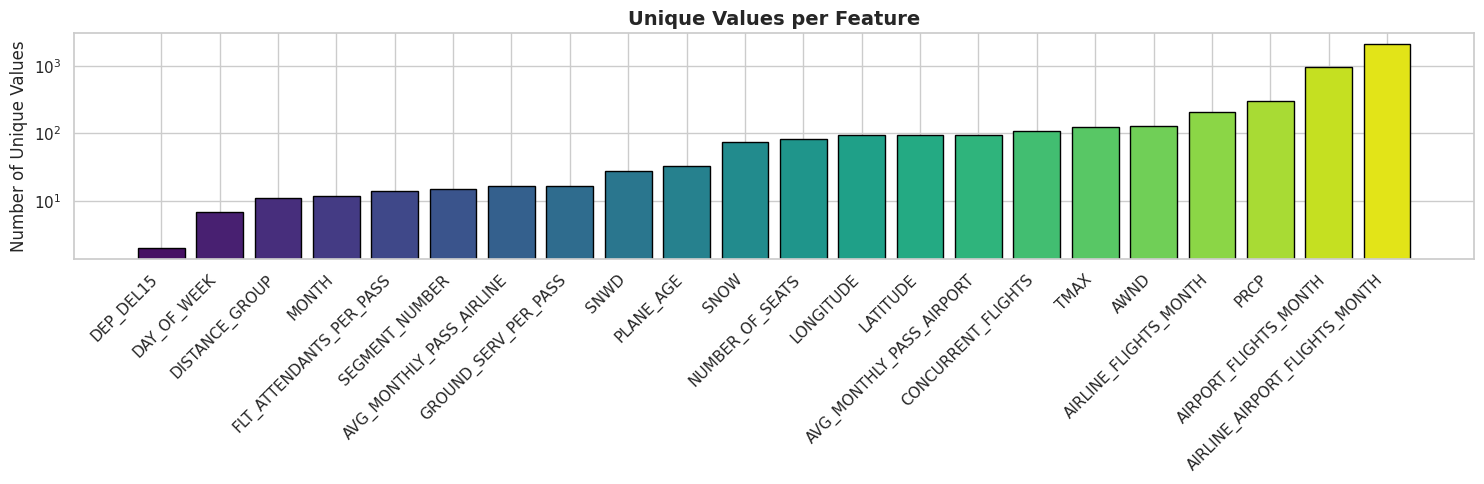

In [15]:
# Compute number of unique values per numerical column
unique_values = df_flights.select_dtypes(include="number").nunique().sort_values()

# Set Seaborn style
sns.set(style="whitegrid")

# Create bar plot with customization
plt.figure(figsize=(15, 5))
bars = plt.bar(
    unique_values.index,
    unique_values.values,
    log=True,                           # log scale y-axis
    color=sns.color_palette("viridis", len(unique_values)),  # colorful bars
    edgecolor='black'
)

# Add title and axis labels
plt.title("Unique Values per Feature", fontsize=14, weight='bold')
plt.ylabel("Number of Unique Values")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


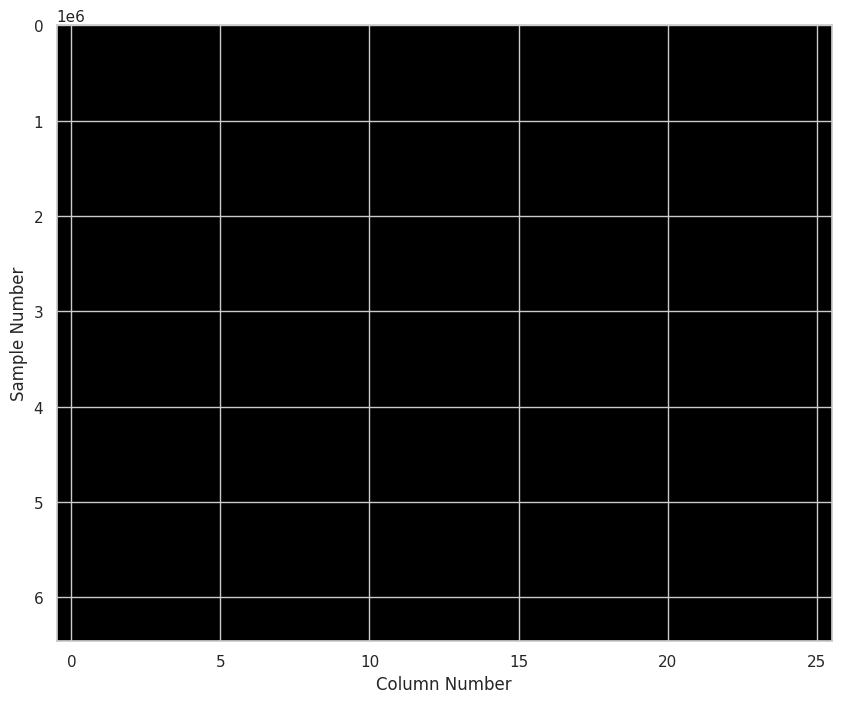

In [16]:
plt.figure(figsize=(10, 8))
plt.imshow(df_flights.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

The above figure shows on the y-axis each of the 6460589 individual samples, and on the x-axis if any of the 26 features contains a missing value. 

#### 2.3.1. Numerical Features
To plot the global view of the dataset for the numerical features, we use .plot() function of pandas and combine it with the following parameters:

- lw=0: lw stands for line width. 0 means that we don’t want to show any lines
- marker=".": Instead of lines, we tell the plot to use . as markers for each data point
- subplots=True: subplots tells pandas to plot each feature in a separate subplot
- layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 4 means to use 4 columns per row.
- figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.

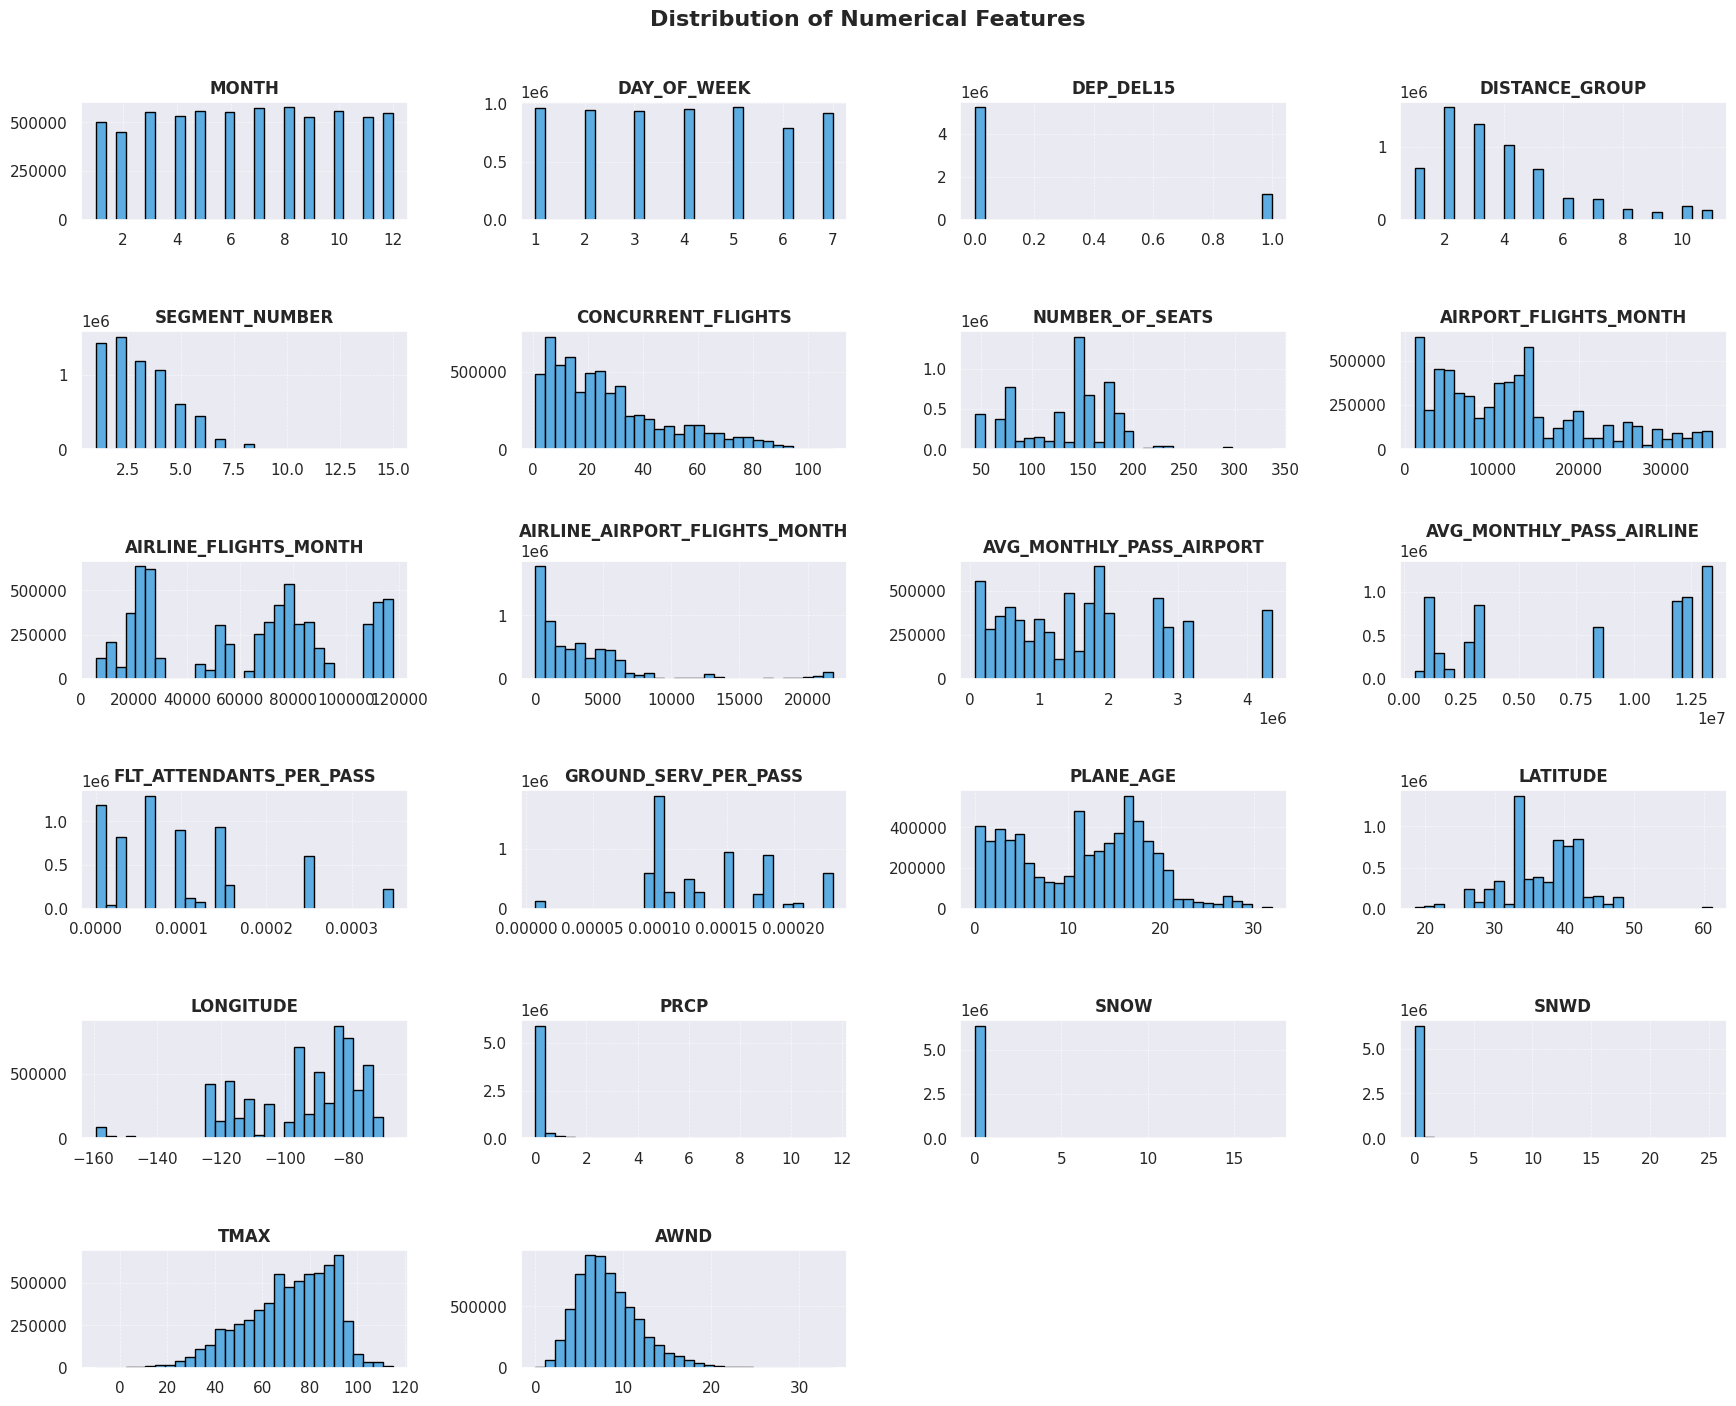

In [17]:

sns.set(style="darkgrid")
colors = sns.color_palette("cubehelix", len(df_flights.select_dtypes("number").columns))

# Create histograms for all numerical features
fig = df_flights.hist(
    bins=30,
    figsize=(18, 14),
    layout=(-1, 4),
    color="#5DADE2",       # A soft blue tone
    edgecolor="black"
)


plt.tight_layout(pad=2.5)

# Adjust individual subplot fonts
for ax in fig.flatten():
    ax.set_title(ax.get_title(), fontsize=12, fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold', y=1.02)
plt.show()


Each point in the above figure is a sample (i.e. a row) in the dataset and each subplot represents a  feature. The y-axis shows the feature value, while the x-axis is the sample index. 

#### 2.3.2. Non-numerical Features
There are multiple ways we can potentially streamline the quality investigation for each individual non-numerical features. None of them is perfect, and all of them will require some follow up investigation. But for the purpose of showcasing one such a solution, what we will do is loop through all non-numerical features and plot for each of them the number of occurrences per unique value.

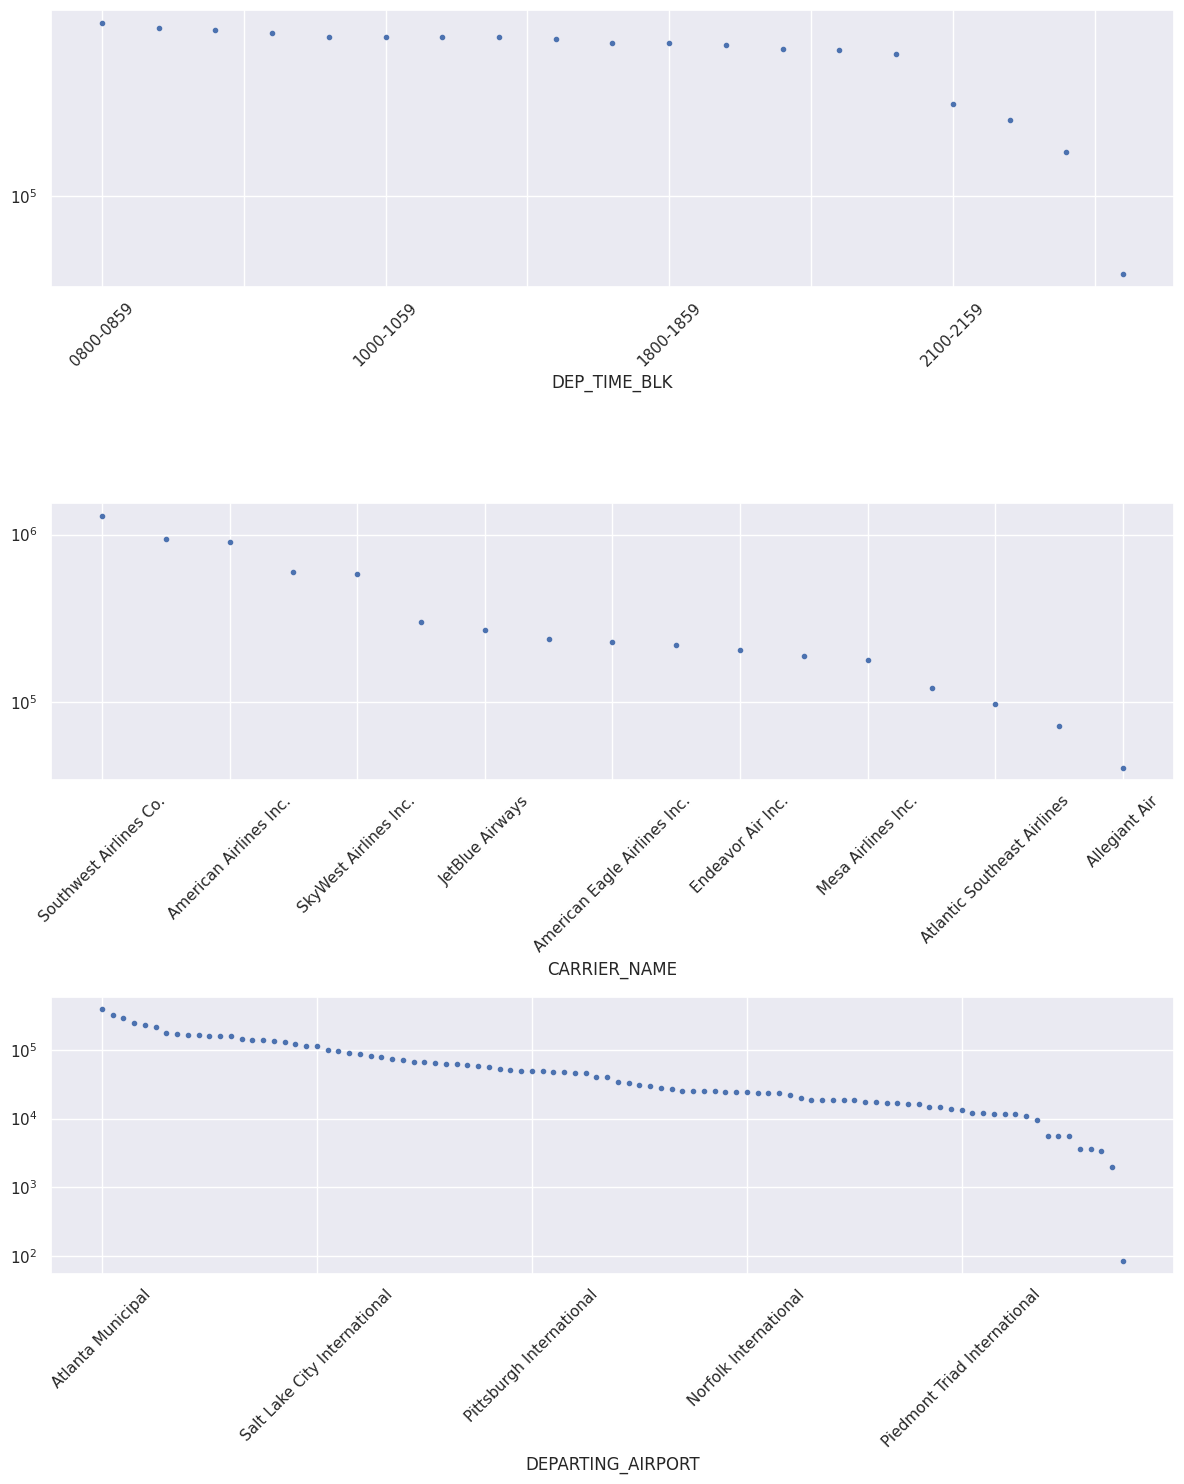

In [18]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 15))

# Identify non-numerical features
df_non_numerical = df_flights.select_dtypes(exclude=["number", "datetime"])

# Loop through features and plot each on its subplot
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    df_non_numerical[col].value_counts().plot(
        logy=True, lw=0, marker=".", ax=ax
    )
    # Remove title and rotate x-axis labels
    ax.set_title("")  
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# ====Content Investigation====

Let's see the distribution in the discerete columns. We'll build a function that shows the distrubution of discerete columns in precents, by entering a column from data frame:

In [19]:
def val_cnt(col):
  print("The percentage of variables in ",end="")
  print(df_flights[col].value_counts(normalize = True) * 100)

In [20]:
# MONTH
val_cnt('MONTH')

The percentage of variables in MONTH
8     8.932266
7     8.908336
10    8.652137
5     8.601337
6     8.584558
3     8.538262
12    8.502367
4     8.223585
11    8.194578
9     8.166144
1     7.737421
2     6.959009
Name: proportion, dtype: float64


In [21]:
# DAY
val_cnt('DAY_OF_WEEK')

The percentage of variables in DAY_OF_WEEK
5    14.932911
1    14.905700
4    14.725654
2    14.588206
3    14.459038
7    14.211723
6    12.176769
Name: proportion, dtype: float64


In [22]:
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df_flights['SEASON'] = df_flights['MONTH'].map(month_to_season)
df_flights[["MONTH", "SEASON"]].sample(10)

,MONTH,SEASON
3893714,8,Summer
3967483,8,Summer
4429513,9,Fall
5892951,11,Fall
5641643,11,Fall
3217337,7,Summer
3518680,7,Summer
1516073,4,Spring
4882921,10,Fall
5272591,10,Fall


In [23]:
# SEASON
val_cnt("SEASON")

The percentage of variables in SEASON
Summer    26.425160
Spring    25.363183
Fall      25.012859
Winter    23.198798
Name: proportion, dtype: float64


In [24]:
# TIME BLOCK
val_cnt("DEP_TIME_BLK")

The percentage of variables in DEP_TIME_BLK
0800-0859    6.939507
0700-0759    6.621935
0600-0659    6.528847
1700-1759    6.326606
1200-1259    6.146467
1000-1059    6.144842
0900-0959    6.113514
1100-1159    6.104335
1500-1559    6.007037
1400-1459    5.814981
1800-1859    5.799982
1600-1659    5.700347
1900-1959    5.541229
1300-1359    5.460988
2000-2059    5.291824
2100-2159    3.420013
2200-2259    2.987452
0001-0559    2.264159
2300-2359    0.785935
Name: proportion, dtype: float64


We can see here that there are less flights in the night and early morning

In [25]:
time_blocks_order = [
    'Early Morning & Late Night',  # 0001-0559
    'Morning',                     # 0600-1159
    'Afternoon',                   # 1200-1659
    'Evening',                     # 1700-1959
    'Night'                        # 2000-2359
]

df_flights['PART_OF_DAY'] = pd.cut(
    df_flights['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])),
    bins=[0, 600, 1200, 1700, 2000, 2400],
    labels=time_blocks_order,
    right=False
)

df_flights[["DEP_TIME_BLK", "PART_OF_DAY"]].sample(10)

,DEP_TIME_BLK,PART_OF_DAY
1226517,0900-0959,Morning
1537936,1300-1359,Afternoon
6221675,0700-0759,Morning
4529315,0900-0959,Morning
267010,1800-1859,Evening
5628527,1500-1559,Afternoon
4458378,0700-0759,Morning
1510934,1100-1159,Morning
1010000,1800-1859,Evening
1564893,1400-1459,Afternoon


In [26]:
val_cnt('PART_OF_DAY')

The percentage of variables in PART_OF_DAY
Morning                       38.452980
Afternoon                     29.129821
Evening                       17.667816
Night                         12.485224
Early Morning & Late Night     2.264159
Name: proportion, dtype: float64


And we can see again that there are less flights when the time of day is at night, or in the early morning:

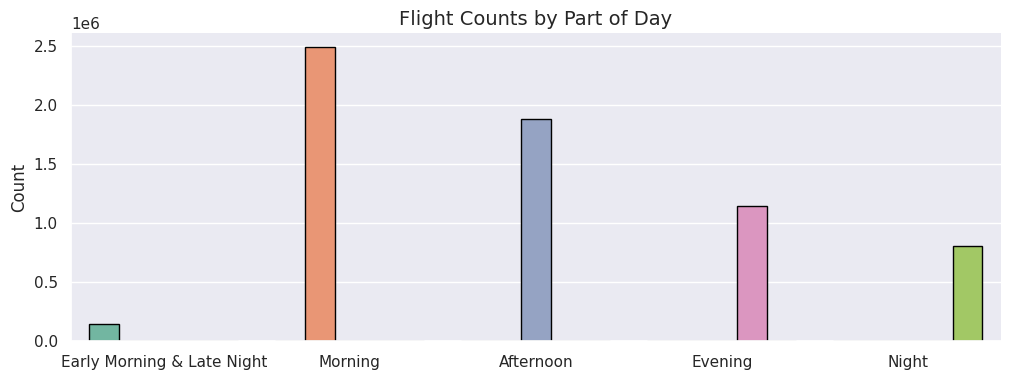

In [27]:
plt.figure(figsize=(12, 4))
sns.countplot(x="PART_OF_DAY", data=df_flights, hue="PART_OF_DAY", palette="Set2", edgecolor="black")
plt.title("Flight Counts by Part of Day", fontsize=14)
plt.xlabel("")
plt.ylabel("Count")
plt.legend().remove()
sns.despine()


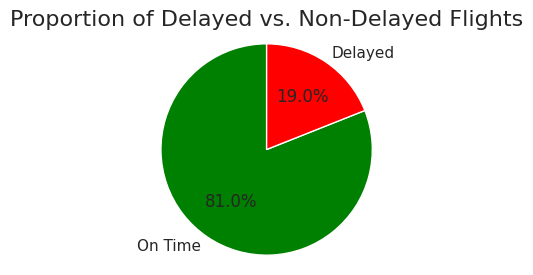

In [28]:
plt.figure(figsize=(3, 3))
plt.pie(df_flights['DEP_DEL15'].value_counts(), labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

plt.title('Proportion of Delayed vs. Non-Delayed Flights', fontsize=16)
plt.axis('equal')

plt.show()

As we can see here, the distribution in our target variable is about 81% in class 0 (false), and 19% in class 1 (true), when there are 4 times more examples of flights who has no delay in them. It suits the 2019 report about delayed flights from Stacker (https://stacker.com/travel/major-airports-longest-departure-delays), which shows the precentage of delayed departured flights is 19.5% in 2019, in the US.

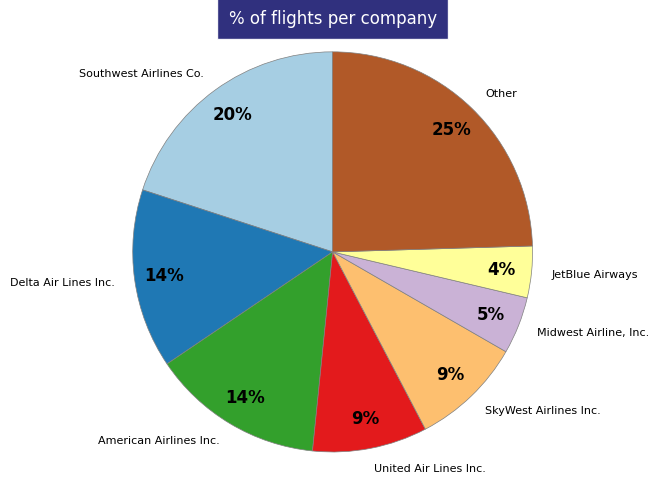

In [29]:
# Calculate proportions
carrier_pct = df_flights['CARRIER_NAME'].value_counts(normalize=True) * 100
main = carrier_pct[carrier_pct >= 3.9]
other = carrier_pct[carrier_pct < 3.9].sum()
carrier_final = pd.concat([main, pd.Series({'Other': other})]) if other else main

# Plot pie chart
plt.figure(figsize=(7, 5))
colors = plt.cm.Paired(np.linspace(0, 1, len(carrier_final)))
wedges, texts, autotexts = plt.pie(carrier_final, labels=carrier_final.index, autopct='%1.0f%%',
                                   startangle=90, pctdistance=0.85, colors=colors,
                                   wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5})

for t in texts: t.set(fontsize=8, color='black')
for at in autotexts: at.set(fontsize=12, color='black', weight='bold')

plt.title('% of flights per company', fontsize=12, color='white',
          bbox=dict(facecolor='midnightblue', alpha=0.9, pad=8))
plt.axis('equal')
plt.tight_layout()
plt.show()


In [30]:
pd.pivot_table(df_flights, index = 'DEP_DEL15', values = 'SNOW', columns = 'SEASON', aggfunc = 'mean')

SEASON,Fall,Spring,Summer,Winter
DEP_DEL15,,,,
0,0.01406,0.020577,0.0,0.065539
1,0.06733,0.050861,0.0,0.157219


Rows: Departue delay (True/False)

Columns: Seasons (בדיד)

Calculated values: Snow amount

Mainly in winter, there more snow amount for delayed flights compared to non-delayed flights. It occurs on fall ans spring, and on summer there is no snow.

In [31]:
df_flights.groupby('DEP_DEL15').agg({'AWND': 'mean', 'PRCP': 'mean', 'SNOW': 'mean', 'SNWD': 'mean', 'TMAX': 'mean'})

,AWND,PRCP,SNOW,SNWD,TMAX
DEP_DEL15,,,,,
0,8.252683,0.090442,0.023930,0.082429,71.544496
1,8.721610,0.160630,0.064455,0.130881,71.128258


Rows: Departure delay (True/False)

Columns: Weather parameters.

We can see that on average, the true departue delay row has slightly stronger wind, more precepration, snow and snow on ground, and the max temparture is lower.

Important to notice that the 75% (third block) of PRCP, SNOW and SNOW is 0 in the describe function, which means that most of data in these columns is 0, that's why the diffreneces are small and numbers aren't big.

In [32]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_flights.groupby('DEP_DEL15').agg({'CONCURRENT_FLIGHTS' : 'mean', 'NUMBER_OF_SEATS': 'mean', 'AIRPORT_FLIGHTS_MONTH' : 'mean', 'AIRLINE_FLIGHTS_MONTH' : 'mean', 'AVG_MONTHLY_PASS_AIRPORT' : 'mean', 'AVG_MONTHLY_PASS_AIRLINE' : 'mean'})

,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE
DEP_DEL15,,,,,,
0,27.75,133.47,12575.67,62952.37,1575960.45,7818546.94
1,28.23,134.88,13171.57,63221.12,1645056.70,7829133.02


Rows: Departure Delay (True/False - binary)

Columns: Airport, Airline and Flight statistics

Delayed flights have slightly higher averages for concurrent flights, number of seats, airline flights month. As well as more significant difference at airport flights month, average monthly passengers at both the airport and the airline compared to non-delayed flights.

# Continuous features
Now that we have a way to select the continuous features, let’s use seaborn’s pairplot to visualize the relationships between these features. 

let’s simplify our option by deciding that we treat features with less than 35 unique features as discrete or ordinal features, and the other features as continuous features.

In [36]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_flights.select_dtypes(include="number").nunique() >= 35

In [37]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_flights[cols_continuous[cols_continuous].index]
df_continuous.shape

(6460589, 12)

In [ ]:
sns.pairplot(
    df_continuous,
    height=2,
    plot_kws={"s": 7, "alpha": 0.4, "edgecolor": "w"},
    diag_kws={"fill": True, "color": "skyblue"}
)


####  Discrete and Ordinal Features
Finding patterns in the discrete or ordinal features is a bit more tricky. But also here, some quick pandas and seaborn tricks can help us to get a general overview of our dataset. First, let’s select the columns we want to investigate. 

There are multiple ways in which we can investigate all of these features. Let’s try one example, using seaborn’s stripplot() together with a handy zip() for-loop for subplots.

Note, to spread the values out in the direction of the y-axis we need to chose one particular (hopefully informative) feature. While the ‘right’ feature can help to identify some interesting patterns, usually any continuous feature should do the trick. The main interest in this kind of plot is to see how many samples each discrete value contains.

In [38]:
#Create a new dataframe which doesn't contain the numerical continuous features    
df_discrete = df_flights[cols_continuous[~cols_continuous].index]
df_discrete.shape

(6460589, 10)

In [41]:
# Establish number of columns and rows needed to plot all features
#n_cols = 5
#n_elements = len(df_discrete.columns)
#n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
#y_value = df_flights["SEGMENT_NUMBER"]

# Create figure object with as many rows and columns as needed
#fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
#for col, ax in zip(df_discrete.columns, axes.ravel()):
#    sns.stripplot(data=df_flights, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
#plt.tight_layout();

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79534e637100> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79534e634ea0> (for post_execute):


KeyboardInterrupt: 

### 3.3. Feature relationships
Let’s take a look at relationships between features. More precisely how they correlate. The quickest way to do so is to use .corr() function of the pandas. We compute the feature correlation matrix for all numerical features.

In [42]:
# Computes feature correlation
df_corr = df_continuous.corr(method="pearson")

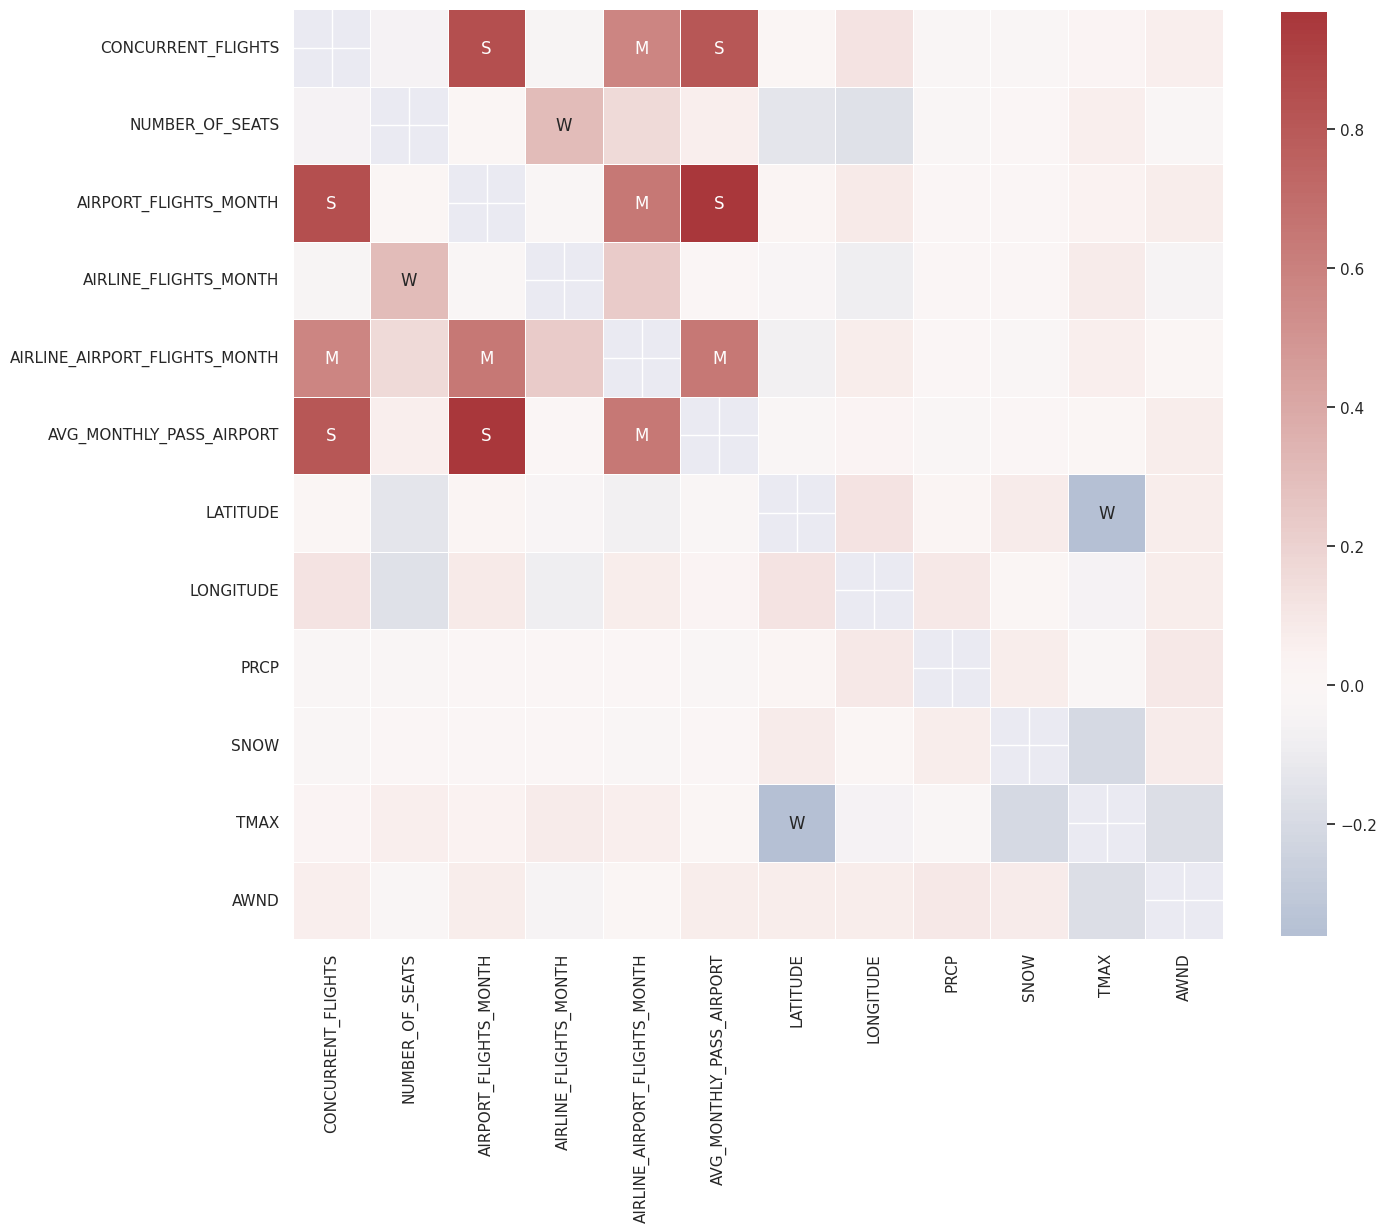

In [43]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [45]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
df_corr_stacked

TMAX                           LATITUDE                        -0.36
                               SNOW                            -0.21
AWND                           TMAX                            -0.17
LONGITUDE                      NUMBER_OF_SEATS                 -0.16
LATITUDE                       NUMBER_OF_SEATS                 -0.14
                                                                ... 
AVG_MONTHLY_PASS_AIRPORT       AIRLINE_AIRPORT_FLIGHTS_MONTH    0.64
AIRLINE_AIRPORT_FLIGHTS_MONTH  AIRPORT_FLIGHTS_MONTH            0.65
AVG_MONTHLY_PASS_AIRPORT       CONCURRENT_FLIGHTS               0.81
AIRPORT_FLIGHTS_MONTH          CONCURRENT_FLIGHTS               0.85
AVG_MONTHLY_PASS_AIRPORT       AIRPORT_FLIGHTS_MONTH            0.97
Length: 66, dtype: float64

During the graphs, the green color will be flights that have arrived on time, and red is delayed flights, exactly like the boards in the airport.

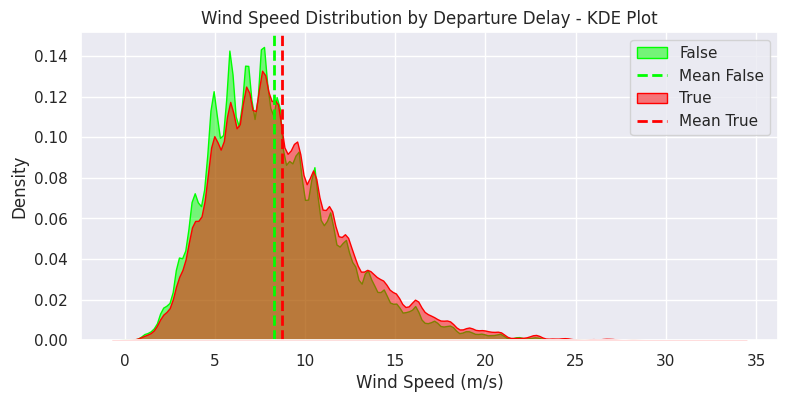

In [46]:
data_class0 = df_flights[df_flights['DEP_DEL15'] == 0]['AWND']
data_class1 = df_flights[df_flights['DEP_DEL15'] == 1]['AWND']
plt.figure(figsize=(9, 4))

sns.kdeplot(data_class0, color='lime', label='False', alpha=0.5, fill = True)
plt.axvline(data_class0.mean(), color='lime', linestyle='--', linewidth=2, label='Mean False')
sns.kdeplot(data_class1, color='red', label='True', alpha=0.5, fill = True)
plt.axvline(data_class1.mean(), color='red', linestyle='--', linewidth=2, label='Mean True')


plt.legend()
plt.title('Wind Speed Distribution by Departure Delay - KDE Plot')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.show()

Graph - KDE plot

X axis - Max wind speed (continuous)

Y axis - Density

Hue - Departure Delay (True/False - binary)

We can notice that aproximately after the wind speed reaches the mean of non delay and it gets stronger - the density of flights who have delay is higher

<Axes: title={'center': 'Max Tempartue Across Months - Line Plot'}, xlabel='Month', ylabel='Max Temparture (F)'>

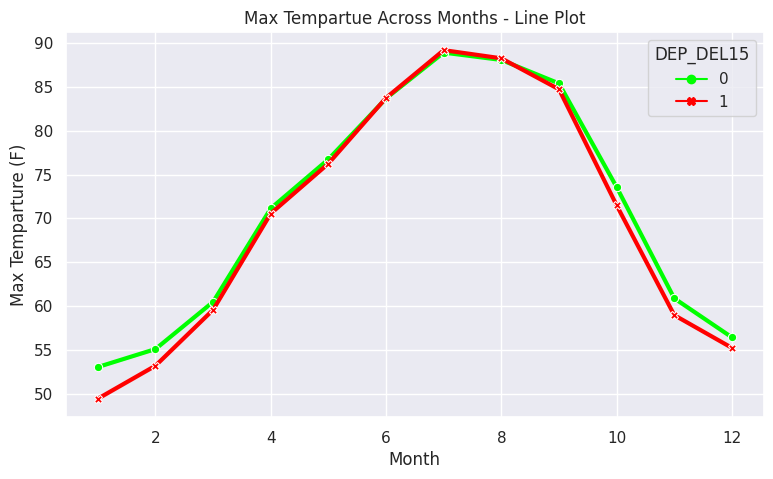

In [59]:
plt.figure(figsize=(9, 5))
plt.title("Max Tempartue Across Months - Line Plot")
plt.xlabel("Month")
plt.ylabel("Max Temparture (F)")
sns.lineplot(x = df_flights.MONTH, y = df_flights.TMAX, hue = df_flights.DEP_DEL15, palette={0: 'lime', 1: 'red'}, style=df_flights.DEP_DEL15, markers=True, dashes=False, linewidth = 3)

Graph - Line Plot

X axis - Month (discrete)

Y axis - Max Temparture (continuous)

Hue - Departure Delay (True/False - binary)

We can conclude several things from this graph:

In the summer months, the max temparture is way higher than the other months, and in winter is lower.
The max temparture in each month matches both delay and non delays flights (especially in summer months) - the curves look alike, which indicates that max tempartue doesn't affect much the probability of having a delay. In spite of that, in winter months, the avergae max tempartue of delay class is lower, and in winter months there are bad weather conditions.
The tempartue by itself doesn't affect the delay, but id does affect other weather parameters which cause delay.

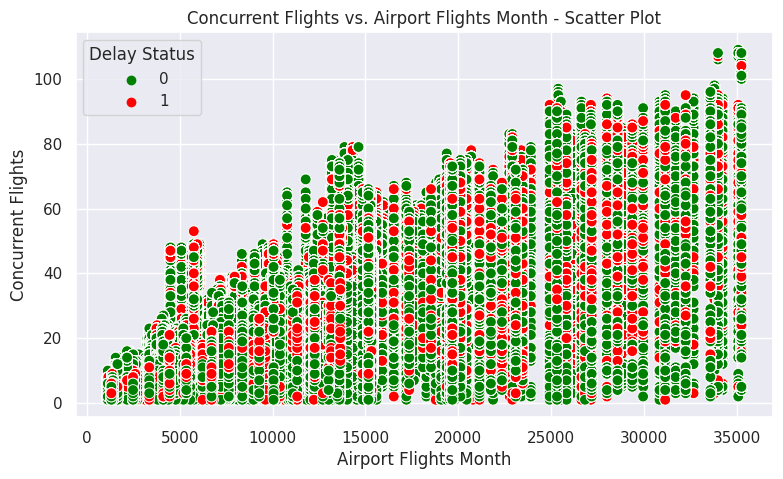

In [60]:
plt.figure(figsize=(9, 5))
sns.scatterplot(y = df_flights.CONCURRENT_FLIGHTS, x = df_flights.AIRPORT_FLIGHTS_MONTH, hue = df_flights.DEP_DEL15, s = 60, palette={0: 'green', 1: 'red'})
plt.title('Concurrent Flights vs. Airport Flights Month - Scatter Plot')
plt.xlabel('Airport Flights Month')
plt.ylabel('Concurrent Flights')
plt.legend(title='Delay Status')
plt.show()

Graph - Scatter Plot

X axis - Average Airport Flights per Month (continuous).

Y axis - Amount of flights departing from the airport in the same time block (continuous)

Hue - Departure Delay (True/False - binary)

This graph describes the load and traffic of flights, we can learn several insights:

The graph shows that as the number of flights at an airport increases, so does the number of concurrent flights
the load of airport doesn't impact delays (red dots) much.

<Axes: title={'center': 'Segment Number Across Distance Groups - Bar Plot'}, xlabel='DISTANCE_GROUP', ylabel='SEGMENT_NUMBER'>

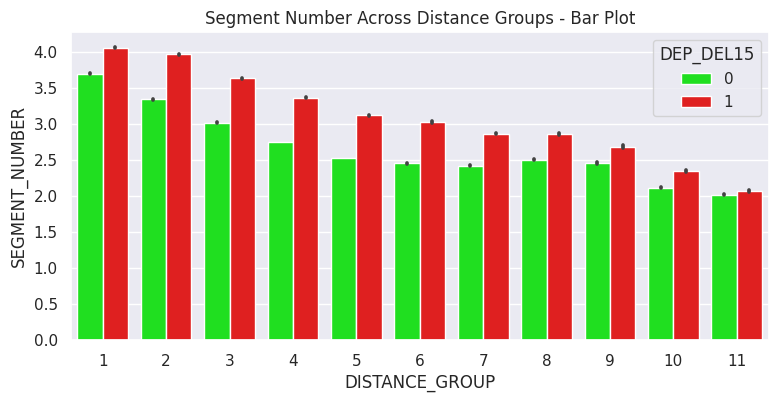

In [61]:
plt.figure(figsize=(9, 4))
plt.title("Segment Number Across Distance Groups - Bar Plot")
plt.xlabel("Distance Group")
plt.ylabel("Segment Number")
sns.barplot(x = df_flights.DISTANCE_GROUP, y = df_flights.SEGMENT_NUMBER, hue = df_flights.DEP_DEL15, palette={0: 'lime', 1: 'red'})

Graph - Bar Plot

X axis - Distance Group (discrete)

Y axis - Amount of segments an aircraft had on the same day before current flight (continuous)

Hue - Departure Delay (True/False - binary)

We can insight several items:

The graph shows that as the distance group increases, the segment number decreases - an aircraft can't manage to have several flights if it has a longer flight before the current one.
Delayed flights consistently have higher segment numbers than non-delayed flights within the same distance group. This suggests that flights with more segments per day are more prone to delays, especially for shorter distances.

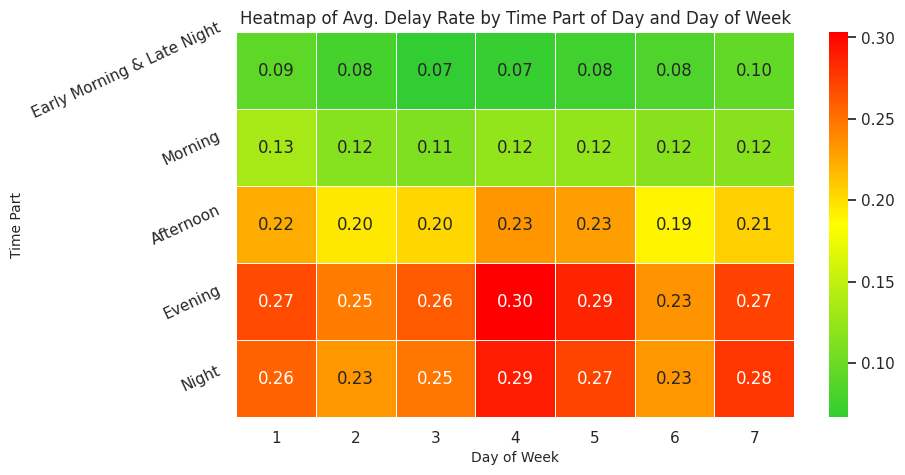

In [63]:
from matplotlib.colors import LinearSegmentedColormap


heatmap_data = pd.pivot_table(
    df_flights,
    values='DEP_DEL15',
    index='PART_OF_DAY',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)

# Define the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom', ['limegreen', 'yellow', 'red'])

# Plotting the heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=.5)

# Adding titles and labels
plt.title('Heatmap of Avg. Delay Rate by Time Part of Day and Day of Week', fontsize=12)
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Time Part', fontsize=10)
plt.yticks(rotation=25)
plt.show()

Graph - Heatmap

X axis - Day of Week (discrete)

Y axis - Part Time of Day (discrete)

Values - Mean of Departure Delay, by the x and y axes.

As we can see in this graph, the part of the day highly affect the propabilty of having a delay. When the the day begins, until morning, there are less chances of delay (color is brighter). Later that day, there are more chances of having a delay (color is darker). In addition, the day of week column doesn't affect much the delay, we can notice that the color of each cell in a row are pretty similar, the columns are pretty simillar too, what most determines impact on the delay here is the part of day.